In [1]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy
from skfuzzy import control as ctrl
import warnings

warnings.filterwarnings('ignore')

In [3]:
#Declarar universos de discurso
#Cantidad de quejas
quejas = ctrl.Antecedent(np.arange(0, 1001, 1), 'quejas')

#Número de transacciones
transacciones = ctrl.Antecedent(np.arange(0, 501, 1), 'transacciones')

#Retiros
retiros = ctrl.Antecedent(np.arange(0, 301, 1), 'retiros')

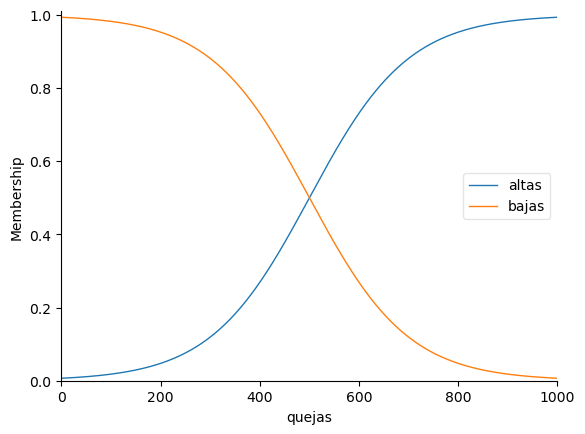

In [5]:
#Visualizar conjuntos borrosos
quejas['altas'] = skfuzzy.sigmf(quejas.universe, 500, 0.01)
quejas['bajas'] = skfuzzy.sigmf(quejas.universe, 500, -0.01)
quejas.view()
plt.show()

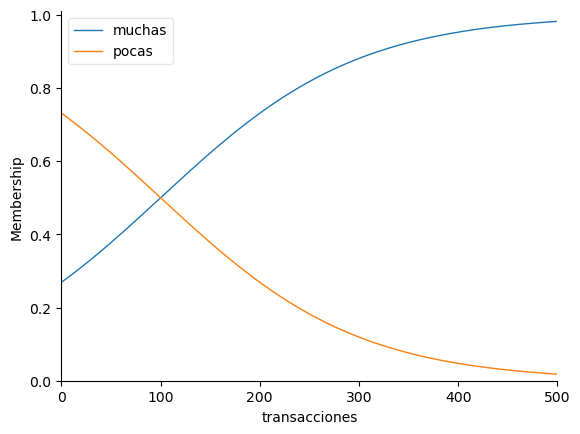

In [6]:
#Transacciones
transacciones['muchas'] = skfuzzy.sigmf(transacciones.universe, 100, 0.01)
transacciones['pocas'] = skfuzzy.sigmf(transacciones.universe, 100, -0.01)
transacciones.view()
plt.show()

In [7]:
#MODELO TAKAGI SUGENO
#Quejas
quejas = np.arange(0, 1001, 1)
quejas_altas = skfuzzy.sigmf(quejas, 500, 0.01)
quejas_bajas = skfuzzy.sigmf(quejas, 500, -0.01)

#Transacciones
transacciones = np.arange(0, 501, 1)
transacciones_muchas = skfuzzy.sigmf(transacciones, 100, 0.01)
transacciones_pocas = skfuzzy.sigmf(transacciones, 100, -0.01)

#Funciones del consequente
def r1 (Q, T):
    return 0.46 * Q - 0.125 * T

def r2 (Q, T):
    return 0.46 * Q - 2 * T

def r3 (Q, T):
    return 0.04 * Q - 0.125 * T

def r4 (Q, T):
    return 0.04 * Q - 2 * T

In [8]:
#Motor de Reglas
def regla_1 (Q, T):
    mu1 = min(skfuzzy.interp_membership(quejas, quejas_altas, Q),
             skfuzzy.interp_membership(transacciones, transacciones_muchas, T))
    return mu1

def regla_2 (Q, T):
    mu2 = min(skfuzzy.interp_membership(quejas, quejas_altas, Q),
             skfuzzy.interp_membership(transacciones, transacciones_pocas, T))
    return mu2

def regla_3 (Q, T):
    mu3 = min(skfuzzy.interp_membership(quejas, quejas_bajas, Q),
             skfuzzy.interp_membership(transacciones, transacciones_muchas, T))
    return mu3

def regla_4 (Q, T):
    mu4 = min(skfuzzy.interp_membership(quejas, quejas_bajas, Q),
             skfuzzy.interp_membership(transacciones, transacciones_pocas, T))
    return mu4

In [9]:
#Defuzzificación
def defuzzificacion (Q, T):
    yr1 = r1(Q, T)
    yr2 = r2(Q, T)
    yr3 = r3(Q, T)
    yr4 = r4(Q, T)
    
    m1 = regla_1(Q, T)
    m2 = regla_2(Q, T)
    m3 = regla_3(Q, T)
    m4 = regla_4(Q, T)
    
    num = (yr1 * m1) + (yr2 * m2) + (yr3 * m3) + (yr4 * m4)
    den = m1 + m2 + m3 + m4
    
    return num/den

In [10]:
defuzzificacion(600, 20)

161.9792664644258